In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from openpyxl import load_workbook

# Read excel file and create dict object, containing all sheets
sheet_names = pd.read_excel('/Users/p/Downloads/neueFische/EDA_Project/Data/Muesli Project raw data.xlsx', sheet_name=None)

# Show all sheet names
sheet_names.keys()

dict_keys(['Orders', 'Order Process Data', 'InternData Study', 'Campaign Data'])

In [3]:
# Create a data frame for every sheet
i = 1
for name in sheet_names:
    # For every sheet in the workbook, create a new data frame
    exec(f"df_{i} = pd.DataFrame(sheet_names[name])")
    # Show the name of the sheet and its data frame created
    print(f"Created 'df_{i}' from '{name}' sheet.")
    i += 1

Created 'df_1' from 'Orders' sheet.
Created 'df_2' from 'Order Process Data' sheet.
Created 'df_3' from 'InternData Study' sheet.
Created 'df_4' from 'Campaign Data' sheet.


In [4]:
def format_columns(df,col):
    df.columns = df.columns.str.lower().str.replace(' ', '_').str.strip()
    df.columns = df.columns.str.replace('-', '_')
    df.columns = df.columns.str.replace('/', '_')
    df = df.sort_values(by=col, inplace=True)
    return df

In [5]:
format_columns(df_1, 'order_date')
format_columns(df_2, 'order_date')
format_columns(df_3, 'pickup_date')
format_columns(df_4, 'arrival_scan_date')


In [6]:
# Investigate data frame for less important columns

def unique_checker(df):
    count = 0
    if count < len(df.columns):
        for col in df.columns:
            if len(df[col].unique()) < 50:
                print(f"In '{col}' are {len(df[col].unique())} unique values.\nThese are: {df[col].unique()}\n")
            count += 1
    return

unique_checker(df_1)

In 'ship_mode' are 3 unique values.
These are: ['Standard Class' 'Second Class' 'First Class']

In 'origin_channel' are 3 unique values.
These are: ['Email' 'Facebook' 'Sales']

In 'country_region' are 1 unique values.
These are: ['United States']

In 'state' are 49 unique values.
These are: ['Texas' 'Illinois' 'Pennsylvania' 'Kentucky' 'California' 'Georgia'
 'Virginia' 'Delaware' 'Louisiana' 'Ohio' 'South Carolina' 'Oregon'
 'Arizona' 'Michigan' 'Arkansas' 'Tennessee' 'Florida' 'Indiana' 'Nevada'
 'South Dakota' 'New York' 'Wisconsin' 'Washington' 'New Jersey'
 'Missouri' 'North Carolina' 'Colorado' 'Utah' 'Mississippi' 'Minnesota'
 'Iowa' 'New Mexico' 'Massachusetts' 'Alabama' 'Idaho' 'Montana'
 'Maryland' 'Connecticut' 'New Hampshire' 'Oklahoma' 'Nebraska' 'Maine'
 'Kansas' 'Rhode Island' 'District of Columbia' 'Vermont' 'Wyoming'
 'North Dakota' 'West Virginia']

In 'region' are 4 unique values.
These are: ['Central' 'East' 'South' 'West']

In 'category' are 3 unique values.
These

In [7]:
# Renaming columns
df_1.rename(columns={'postal_code': 'zip_code', 'origin_channel':'order_channel'}, inplace=True)

# Drop less important columns
df_1 = df_1.drop(['country_region', 'city', 'customer_name', 'index', 'ship_mode'], axis=1)

In [8]:
# Investigate data frame for NaN values

def check_Nan(df):
    null_columns = df.isnull().any()
    null_count = df.isnull().sum()
    for column, has_null in null_columns.items():
        if has_null:
            print(f"'{column}' has {null_count[column]} missing values.\nTo drop them use:'df.dropna(subset=['{column}'], inplace=True)'")
            #drop_null = df.dropna(subset=[column], inplace=True)
    return

In [9]:
check_Nan(df_1)

'zip_code' has 11 missing values.
To drop them use:'df.dropna(subset=['zip_code'], inplace=True)'


In [10]:
df_1.dropna(subset=['zip_code'], inplace=True)

In [26]:
df_4.shape

(333, 3)

In [10]:
# Clean up dtypes 

df_1['zip_code'] = df_1['zip_code'].astype(str)
df_1['zip_code'] = df_1['zip_code'].str.replace('.0','')
df_1['profit'] = df_1['profit'].round(2)
df_1['sales'] = df_1['sales'].round(2)

In [11]:
check_def_col = df_1[df_1.duplicated(subset=['order_id','customer_id','product_id'],keep=False)]    # Filter for duplicate rows only on defined columns

drop_rows = check_def_col[check_def_col.duplicated(keep='first')].index     # Filter for duplicate rows on all columns and identify the index   

df_1.drop(drop_rows, inplace=True)       # Drop the duplicates from the data frame
df_1.reset_index(drop=True, inplace=True)

In [ ]:
df_1

In [12]:
# Create new column to display days of the week

df_1['day_of_week'] = df_1['order_date'].dt.day_name()  

In [13]:
# Create data frame only containing wanted columns

df_1_to_merge = df_1[['order_id','customer_id','order_channel','state','region','zip_code','product_id', 'day_of_week']]

In [14]:
# Formatting df_2
format_columns(df_2,'order_date')

df_2 = df_2.drop(['row_id'], axis=1)
df_2.reset_index(drop=True, inplace=True)

In [15]:
# Merge 'Orders' and 'Orders Process Data'

merged_1 = df_1_to_merge.merge(df_2, on='order_id')


In [16]:
# Check for duplicates and drop them

check_def_col = merged_1[merged_1.duplicated(subset=['order_id','customer_id','product_id','order_date'],keep=False)]

# Filter for duplicate rows on all columns and identify the index
drop_rows = check_def_col[check_def_col.duplicated(keep='first')].index

# Drop the duplicates from the data frame
merged_1.drop(drop_rows, inplace=True)
merged_1.reset_index(drop=True, inplace=True)

In [17]:
# Merge df_4 into merged_1

merged_2 = merged_1.merge(df_4, on='order_id')

In [18]:
# Check for duplicates and drop them

check_def_col = merged_2[merged_2.duplicated(subset=['order_id','customer_id','product_id','order_date'],keep=False)]

# Filter for duplicate rows on all columns and identify the index
drop_rows = check_def_col[check_def_col.duplicated(keep='first')].index

# Drop the duplicates from the data frame
merged_2.drop(drop_rows, inplace=True)
merged_2.reset_index(drop=True, inplace=True)

In [ ]:
merged_2.head()

In [19]:
# Calculate and add columns for delivery time from start to end AND delivery time by logistics company 

merged_2['delivery_time_log_company'] = (merged_2['arrival_scan_date'] - merged_2['on_truck_scan_date']).dt.days
merged_2['full_delivery_time'] = (merged_2['arrival_scan_date'] - merged_2['order_date']).dt.days
merged_2.head()

,order_id,customer_id,order_channel,state,region,zip_code,product_id,day_of_week,order_date,on_truck_scan_date,ship_mode,arrival_scan_date,customer_name,delivery_time_log_company,full_delivery_time
0,CA-2019-109666,KM-16720,Email,New York,East,10035,OFF-ST-10000991,Friday,2019-04-19,2019-04-29,Standard Processing,2019-05-03,Kunst Miller,4,14
1,CA-2019-109666,KM-16720,Email,New York,East,10035,OFF-BI-10000174,Friday,2019-04-19,2019-04-29,Standard Processing,2019-05-03,Kunst Miller,4,14
2,CA-2019-109666,KM-16720,Email,New York,East,10035,OFF-SU-10002522,Friday,2019-04-19,2019-04-29,Standard Processing,2019-05-03,Kunst Miller,4,14
3,CA-2019-109666,KM-16720,Email,New York,East,10035,TEC-PH-10004774,Friday,2019-04-19,2019-04-29,Standard Processing,2019-05-03,Kunst Miller,4,14
4,CA-2019-109666,KM-16720,Email,New York,East,10035,OFF-AR-10004022,Friday,2019-04-19,2019-04-29,Standard Processing,2019-05-03,Kunst Miller,4,14


In [20]:
merged_2['delivery_time_log_company'].describe()

count    668.000000
mean       4.561377
std        1.208716
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        7.000000
Name: delivery_time_log_company, dtype: float64

In [24]:
avg_dt_by_processing = merged_2.groupby('ship_mode')['delivery_time_log_company'].mean().reset_index()

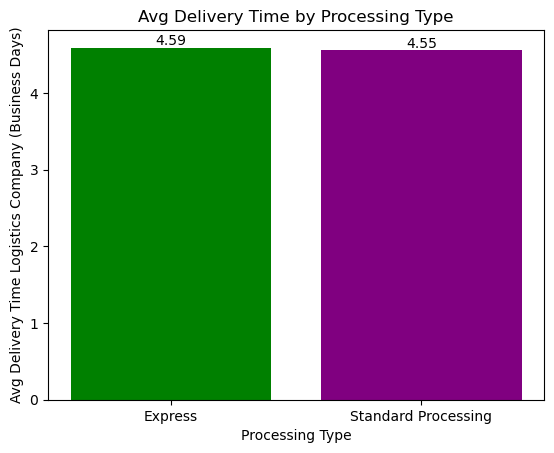

In [25]:
fig, ax = plt.subplots()

colors = ['green', 'purple'] * (len(avg_dt_by_processing) // 2)

bars = ax.bar(avg_dt_by_processing['ship_mode'], avg_dt_by_processing['delivery_time_log_company'], color=colors)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{round(height, 2)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 0),  
                textcoords="offset points",
                ha='center', va='bottom')

plt.xlabel('Processing Type')
plt.ylabel('Avg Delivery Time Logistics Company (Business Days)')
plt.title('Avg Delivery Time by Processing Type')
plt.xticks(rotation=0)

plt.show()


In [26]:
#Create mean of every state
avg_dt_by_state = merged_2.groupby('state')['delivery_time_log_company'].mean()

In [27]:
# Sort values for better visualization
avg_dt_by_state.sort_values(inplace=True)

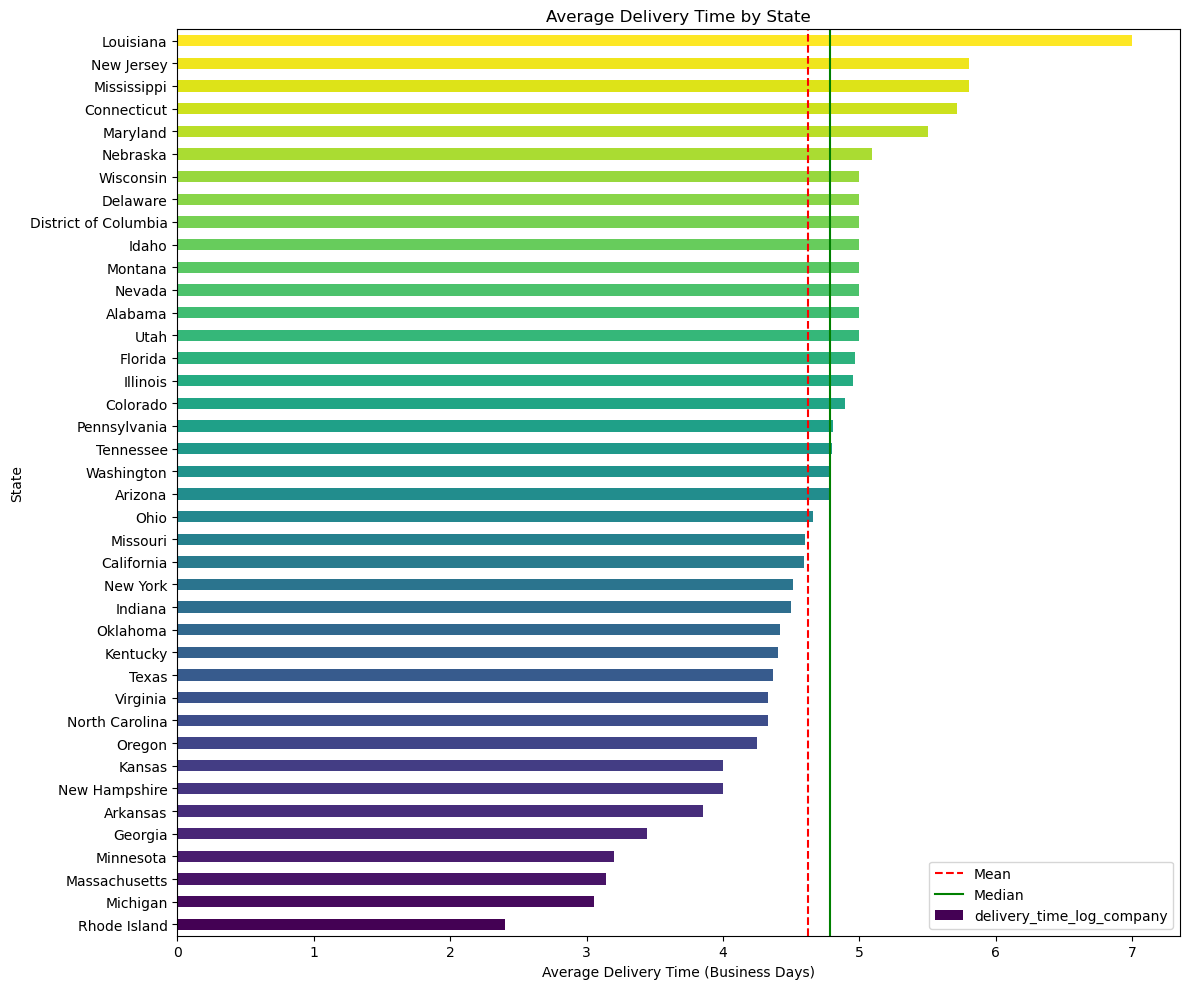

In [28]:
plt.figure(figsize=(12, 10))

colors = plt.cm.viridis(np.linspace(0, 1, len(avg_dt_by_state)))

avg_dt_by_state.plot(kind='barh', color=colors)

mean_delivery_time = avg_dt_by_state.mean()
median_delivery_time = avg_dt_by_state.median()

plt.axvline(mean_delivery_time, color='r', linestyle='--', label='Mean')
plt.axvline(median_delivery_time, color='g', linestyle='-', label='Median')

plt.title('Average Delivery Time by State')
plt.xlabel('Average Delivery Time (Business Days)')
plt.ylabel('State')

plt.legend()

plt.tight_layout() 
plt.show()


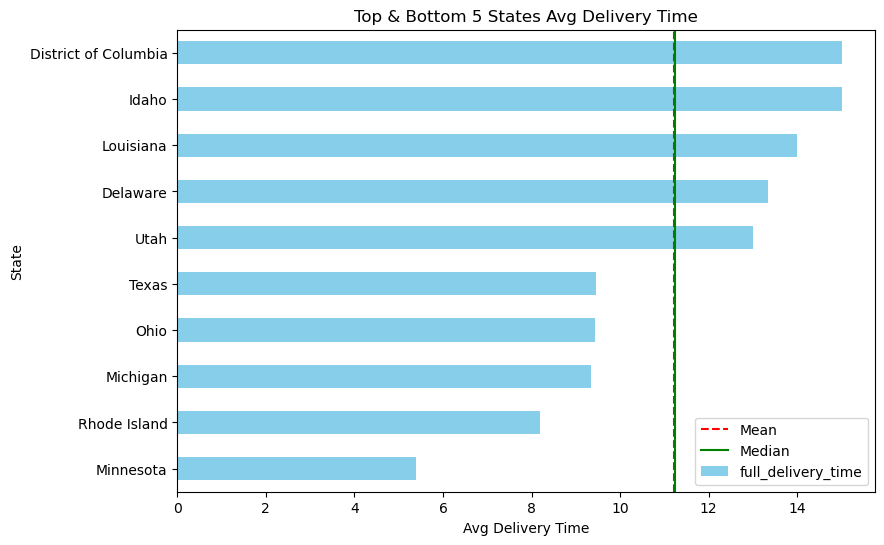

In [51]:

selected_avg_dt_by_state = pd.concat([avg_dt_by_state.head(5), avg_dt_by_state.tail(5)])

plt.figure(figsize=(9, 6))

# Adjust the colors to match the number of selected states
#colors = plt.cm.viridis(np.linspace(0, 1, len(selected_avg_dt_by_state)))

# Plot only the selected states
selected_avg_dt_by_state.plot(kind='barh', color='skyblue')

# Recalculate mean and median for the plotted subset if necessary
# If you want to show the overall mean/median, use the original avg_dt_by_state
mean_delivery_time = selected_avg_dt_by_state.mean()
median_delivery_time = selected_avg_dt_by_state.median()

plt.axvline(mean_delivery_time, color='r', linestyle='--', label='Mean')
plt.axvline(median_delivery_time, color='g', linestyle='-', label='Median')

plt.title('Top & Bottom 5 States Avg Delivery Time')
plt.xlabel('Avg Delivery Time')
plt.ylabel('State')

plt.legend()

plt.show()


In [41]:
merged_2['full_delivery_time'].describe()

count    668.000000
mean      10.886228
std        2.878174
min        3.000000
25%        9.000000
50%       12.000000
75%       13.000000
max       17.000000
Name: full_delivery_time, dtype: float64

In [42]:
merged_2['full_delivery_time'].median()

12.0

In [43]:
full_avg_dt_by_processing = merged_2.groupby('ship_mode')['full_delivery_time'].mean().reset_index()
full_avg_dt_by_processing

,ship_mode,full_delivery_time
0,Express,7.195946
1,Standard Processing,11.936538


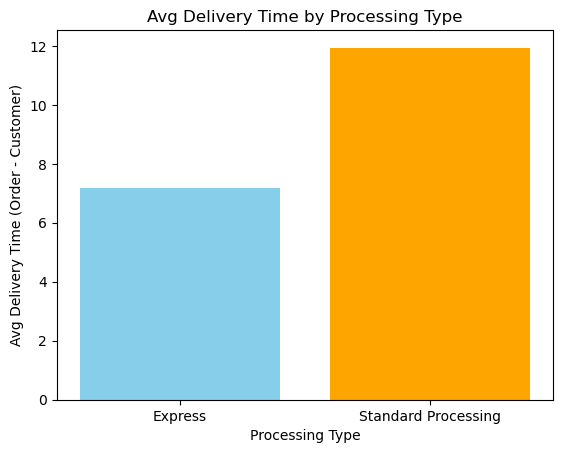

In [44]:
fig, ax = plt.subplots()

#colors = ['green', 'purple'] * (len(full_avg_dt_by_processing) // 2)
category_colors = ['skyblue', 'orange']


bars = ax.bar(full_avg_dt_by_processing['ship_mode'], full_avg_dt_by_processing['full_delivery_time'], color=category_colors)


plt.xlabel('Processing Type')
plt.ylabel('Avg Delivery Time (Order - Customer)')
plt.title('Avg Delivery Time by Processing Type')
plt.xticks(rotation=0)

plt.show()

In [45]:
#Create mean of every state
avg_dt_by_state = merged_2.groupby('state')['full_delivery_time'].mean()

In [46]:
# Sort values for better visualization
avg_dt_by_state.sort_values(inplace=True)

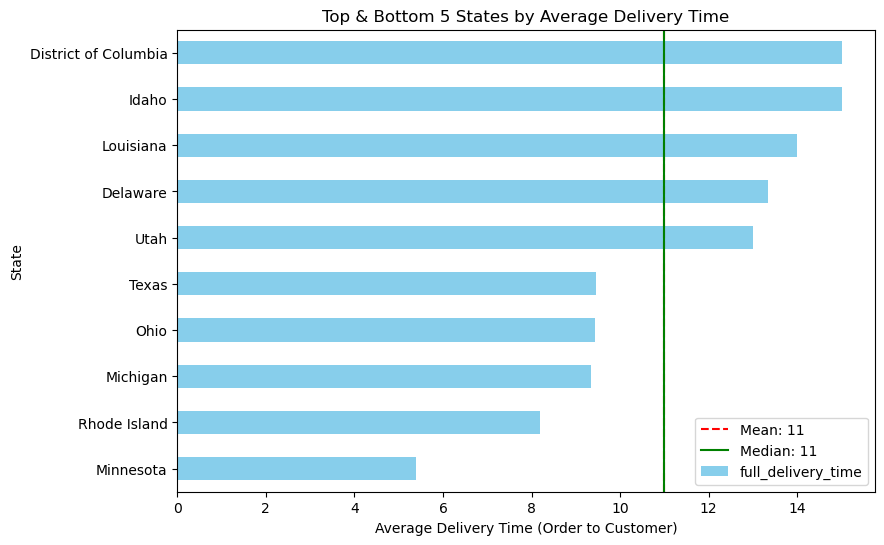

In [67]:
top_bottom_5 = pd.concat([avg_dt_by_state.head(5), avg_dt_by_state.tail(5)])

plt.figure(figsize=(9, 6))

#colors = plt.cm.viridis(np.linspace(0, 1, 10))

top_bottom_5.plot(kind='barh', color='skyblue')

overall_mean = int(avg_dt_by_state.mean())
overall_median = int(avg_dt_by_state.median())

plt.axvline(x=overall_mean, color='r', linestyle='--', label=f'Mean: {overall_mean}')
plt.axvline(x=overall_median, color='g', linestyle='-', label=f'Median: {overall_median}')

plt.title('Top & Bottom 5 States by Average Delivery Time')
plt.xlabel('Average Delivery Time (Order to Customer)')
plt.ylabel('State')

plt.legend()

plt.show()

# __WEEKEND ORDER VOLUME__

In [ ]:
df_1.head()

In [52]:
orders_by_day = df_1['day_of_week'].value_counts()
orders_by_day

day_of_week
Tuesday      1783
Thursday     1735
Wednesday    1702
Friday       1648
Monday       1408
Saturday      874
Sunday        832
Name: count, dtype: int64

In [53]:
orders_by_day.describe()

count       7.000000
mean     1426.000000
std       409.522893
min       832.000000
25%      1141.000000
50%      1648.000000
75%      1718.500000
max      1783.000000
Name: count, dtype: float64

In [57]:
orders_by_day.mode()

0     832
1     874
2    1408
3    1648
4    1702
5    1735
6    1783
Name: count, dtype: int64

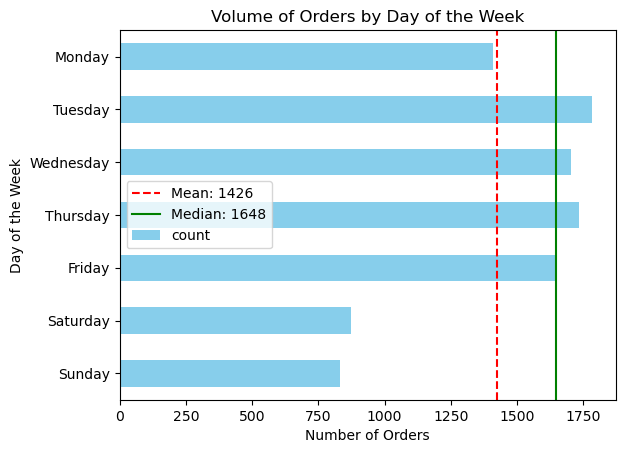

In [63]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_order_inverted = day_order[::-1]
orders_by_day = orders_by_day.reindex(day_order_inverted)
#colors = plt.cm.viridis(np.linspace(0, 1, len(orders_by_day)))

fig, ax = plt.subplots()
orders_by_day.plot(kind='barh', color='skyblue', ax=ax)

plt.title('Volume of Orders by Day of the Week')
plt.xlabel('Number of Orders')
plt.ylabel('Day of the Week')

mean_orders = int(orders_by_day.mean())
median_orders = int(orders_by_day.median())

ax.axvline(mean_orders, color='red', linestyle='--', label=f'Mean: {mean_orders}')
ax.axvline(median_orders, color='green', linestyle='-', label=f'Median: {median_orders}')

plt.legend()

plt.show()


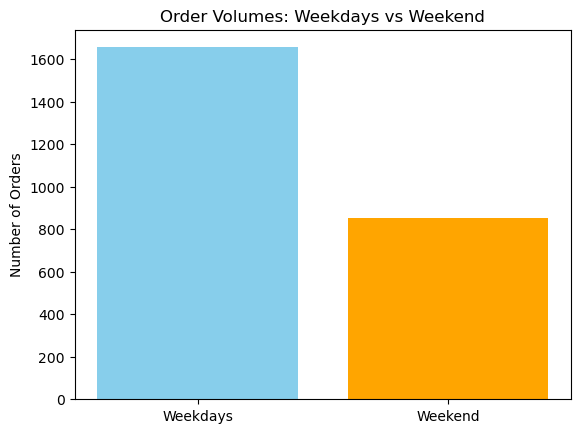

In [55]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_days = day_order[:5]
week_end = day_order[5:]

week_days_mean = orders_by_day.loc[week_days].mean()
week_end_mean = orders_by_day.loc[week_end].mean()

categories = ['Weekdays', 'Weekend']
values = [week_days_mean, week_end_mean]

category_colors = ['skyblue', 'orange']

fig, ax = plt.subplots()


ax.bar(categories, values, color=category_colors)

plt.title('Order Volumes: Weekdays vs Weekend')
plt.ylabel('Number of Orders')

plt.show()


In [72]:
sum = (week_days_mean + week_end_mean)/2
sum

1254.1

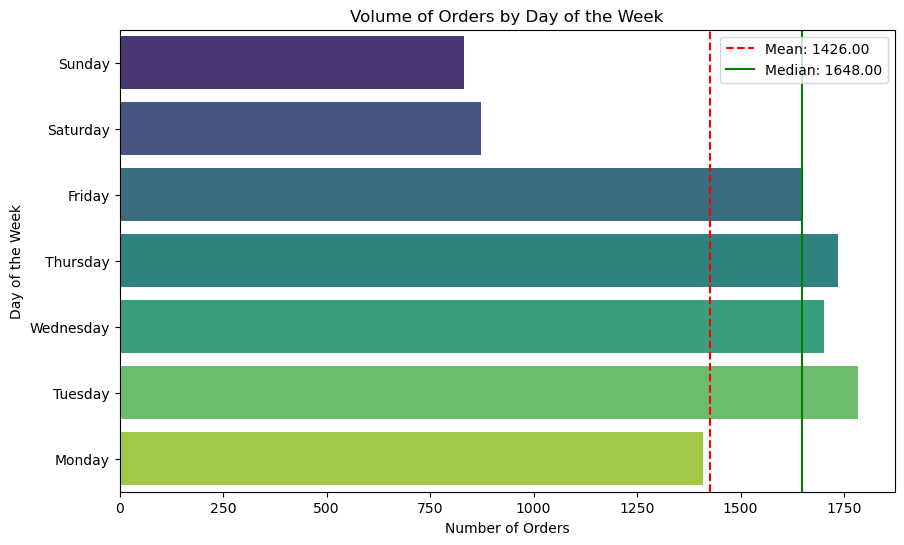

In [56]:

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_order_inverted = day_order[::-1]
orders_by_day = orders_by_day.reindex(day_order_inverted)
colors = plt.cm.viridis(np.linspace(0, 1, len(orders_by_day)))

# Assuming 'orders_by_day' is a pandas Series with days of the week as the index and order counts as values
# Preparing data for seaborn
data_for_plot = orders_by_day.reset_index()
data_for_plot.columns = ['Day of the Week', 'Number of Orders']

# Creating a seaborn bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Number of Orders', y='Day of the Week', data=data_for_plot, palette='viridis')

# Calculate mean and median to add to the plot
mean_orders = orders_by_day.mean()
median_orders = orders_by_day.median()

# Add lines for mean and median
plt.axvline(x=mean_orders, color='red', linestyle='--', label=f'Mean: {mean_orders:.2f}')
plt.axvline(x=median_orders, color='green', linestyle='-', label=f'Median: {median_orders:.2f}')

plt.title('Volume of Orders by Day of the Week')
plt.xlabel('Number of Orders')
plt.ylabel('Day of the Week')
plt.legend()

plt.show()



In [1]:
df_1

NameError: name 'df_1' is not defined